1. К вам, как к аналитику, обратился ваш друг риэлтор и попросил написать программу, которая бы выводила стоимость квартиры в зависимости от введенной общей площади. Он дал вам файл с данными о стоимости одного квадратного метра в зависимости от площади квартир: https://disk.yandex.ru/d/v2BuPNXg2_y2-g. Помогите другу.


[Метод наименьших квадратов](http://vmath.ru/vf5/interpolation/mnk)

In [43]:
with open('data.csv', 'r', encoding='utf-8') as file:
    data = [s.split(',') for s in file.read().strip().split('\n')[1:]]

xx = [float(s[0]) for s in data]
yy = [float(s[1]) for s in data]


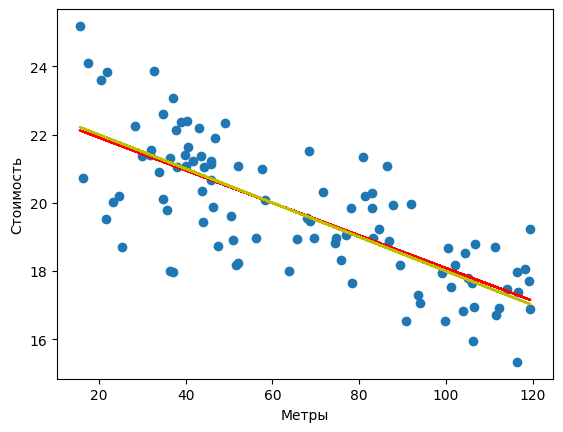

(-0.047835860169990106, 22.868711789443797)

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

fp = np.polyfit(xx, yy, 1)
k = fp[0]
b = fp[1]
new_y = [k*x + b for x in xx]
plt.scatter(xx, yy)
plt.xlabel("Метры")
plt.ylabel("Стоимость")
plt.plot(xx, new_y, 'r')
real_y = [-0.05 * x + 23 for x in xx]
plt.plot(xx, real_y, 'y')
plt.show()
k, b

In [82]:
x = 123
print(f'Квартира {x}кв.м будет стоить {round((k*x+b) * x, 2) * 1000} рублей')

Квартира 123кв.м будет стоить 2089139.9999999998 рублей


### Решение математикой

In [80]:

alfa1 = sum([y * x for x, y in zip(xx, yy)]) / len(xx)
alfa2 = sum([x**2 for x in xx]) / len(xx)

avg_x = sum(xx) / len(xx)
avg_y = sum(yy) / len(yy)

alfa_k = (alfa1 - avg_x * avg_y) / (alfa2 - avg_x ** 2)
alfa_b = avg_y - alfa_k * avg_x

alfa_k, alfa_b


(-0.047835860169991286, 22.868711789443875)

Домашнее задание

2. Задача та же только теперь набор данных по-больше [data_2](data_2.csv) и помимо площади, нужно еще вводить и этаж квартиры.